<a href="https://colab.research.google.com/github/DGkurnia/cnkproject/blob/main/BMLP_Derfansyah_Guswiranata_Kurnia_clasif.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [1]:
#Perpustakaan awal
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import time

In [2]:
#perpustakaan untuk impordata
import sys
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#instalasi regressor
!pip install catboost #catboost
!pip install lightgbm #lightbgm

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 11.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.1/47.1 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 36.4 MB/s eta 0:00:00


In [4]:
#instalasi paket (p1)
from sklearn.exceptions import ConvergenceWarning
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
#lanjut

In [5]:
#Bagian 2
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score,GridSearchCV
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler, RobustScaler
from sklearn.impute import KNNImputer
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [6]:
#Robust scaler
from sklearn.preprocessing import RobustScaler

In [8]:
#instalasi xgboost
!pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.9/153.9 MB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.0/199.0 MB 2.2 MB/s eta 0:00:00


In [9]:
#instalasi regressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from sklearn.neighbors import KNeighborsRegressor
#lanjutan impor regresor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor

# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [10]:
#Pemeriksaan data
#Instalasi dataset dari Google Drive
clabnb = pd.read_csv('/content/drive/MyDrive/csv-files/clusairbnb.csv')
#persiapan salinan
clabnbii = clabnb.copy()
clabnbii.head(7)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,Cluster
0,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4,1,194,unit asing
1,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,2019-06-09,1,4,188,unit asing
2,6848,Only 2 stops to Manhattan studio,15991,Allen & Irina,Brooklyn,Williamsburg,40.70837,-73.95352,Entire home/apt,140,2,148,2019-06-29,1,1,46,unit asing
3,7097,Perfect for Your Parents + Garden,17571,Jane,Brooklyn,Fort Greene,40.69169,-73.97185,Entire home/apt,215,2,198,2019-06-28,1,1,321,unit asing
4,7726,Hip Historic Brownstone Apartment with Backyard,20950,Adam And Charity,Brooklyn,Crown Heights,40.67592,-73.94694,Entire home/apt,99,3,53,2019-06-22,4,1,21,unit asing
5,8490,"MAISON DES SIRENES1,bohemian apartment",25183,Nathalie,Brooklyn,Bedford-Stuyvesant,40.68371,-73.94028,Entire home/apt,120,2,88,2019-06-19,0,2,233,unit asing
6,11708,Cute apt in artist's home,44145,Tyrome,Brooklyn,Bushwick,40.70186,-73.92745,Entire home/apt,85,2,231,2019-06-22,1,2,22,unit asing


In [11]:
#pengubahan identitas ke kolom kata-kata
clabnbii[['id','host_id']] = clabnbii[['id','host_id']].astype(str).copy()
clabnbii.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  object 
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  object 
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [12]:
#Persiapan aspek numerikal melalui inspeksi kolom numerik
numdf = clabnbii.select_dtypes(include=[np.number]).copy()
numdf.info()
#ke eksekusi

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   latitude                        48895 non-null  float64
 1   longitude                       48895 non-null  float64
 2   price                           48895 non-null  int64  
 3   minimum_nights                  48895 non-null  int64  
 4   number_of_reviews               48895 non-null  int64  
 5   reviews_per_month               48895 non-null  int64  
 6   calculated_host_listings_count  48895 non-null  int64  
 7   availability_365                48895 non-null  int64  
dtypes: float64(2), int64(6)
memory usage: 3.0 MB


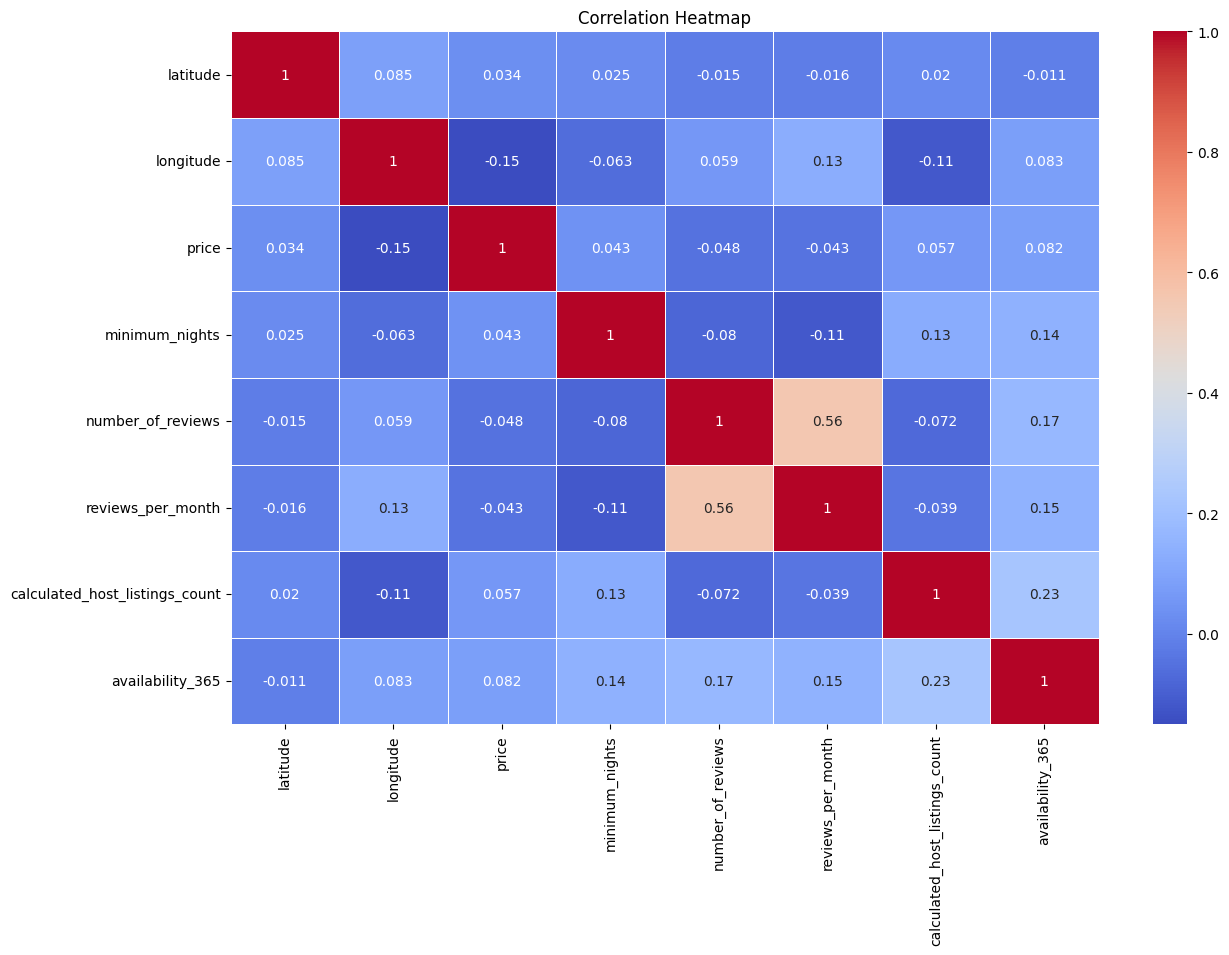

In [14]:
#Pemeriksaan matriks korelasi
matkor = numdf.corr()
#ilustrasi grafik melalui denag
plt.figure(figsize=(14, 9))
sns.heatmap(matkor, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [15]:
#Inspeksi tahap awal
numdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   latitude                        48895 non-null  float64
 1   longitude                       48895 non-null  float64
 2   price                           48895 non-null  int64  
 3   minimum_nights                  48895 non-null  int64  
 4   number_of_reviews               48895 non-null  int64  
 5   reviews_per_month               48895 non-null  int64  
 6   calculated_host_listings_count  48895 non-null  int64  
 7   availability_365                48895 non-null  int64  
dtypes: float64(2), int64(6)
memory usage: 3.0 MB


In [20]:
#pengambilan kolom dari harga
clasdf = numdf.iloc[:, 2:].copy()
clasdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 6 columns):
 #   Column                          Non-Null Count  Dtype
---  ------                          --------------  -----
 0   price                           48895 non-null  int64
 1   minimum_nights                  48895 non-null  int64
 2   number_of_reviews               48895 non-null  int64
 3   reviews_per_month               48895 non-null  int64
 4   calculated_host_listings_count  48895 non-null  int64
 5   availability_365                48895 non-null  int64
dtypes: int64(6)
memory usage: 2.2 MB


- Harga dan lima indikator lainya menjadi penentu
- Tujuan pemakaian kopi adalah **"Penjagaan data asli"**

In [21]:
#Persiapan 'standardisasi' melalui "Robust scaler"
scaler = RobustScaler()

In [27]:
#pengubahan dataset ke bentuk standar
clasdfsca = scaler.fit_transform(clasdf) #sudah distandardisasi
clasdfsca = pd.DataFrame(clasdfsca, columns=clasdf.columns) #ubah ke df
clasdfsca.head(7)#cek hasil

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,-0.160377,-0.50,11.521739,4.0,0.0,0.656388
1,0.415094,-0.50,6.739130,1.0,3.0,0.629956
2,0.320755,-0.25,6.217391,1.0,0.0,0.004405
3,1.028302,-0.25,8.391304,1.0,0.0,1.215859
4,-0.066038,0.00,2.086957,4.0,0.0,-0.105727
5,0.132075,-0.25,3.608696,0.0,1.0,0.828194
6,-0.198113,-0.25,9.826087,1.0,1.0,-0.101322


# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

Proses awal menggunakan rasio 3:1 untuk (latihan dan tes)

In [28]:
#deklarasi X dan y
y = clasdfsca['price'].copy() #Harga
#ke X

In [29]:
#deklarasi X
X = clasdfsca.drop('price', axis=1).copy() #semua kolom kecuali harga

In [18]:
#Persiapan latihan
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=25)

aspek yang diperhatikan
* y adalah harga (dalam USD)
* x dalah indikator lain

In [32]:
#Inisiasi model
models = [('LR', LinearRegression()),
          ("Ridge", Ridge()),
          ("Lasso", Lasso()),
          ("ElasticNet", ElasticNet()),
          ('KNN', KNeighborsRegressor()),
          ('CART', DecisionTreeRegressor()),
          ('RF', RandomForestRegressor()),
          ('GBM', GradientBoostingRegressor()),
          ("XGBoost", XGBRegressor(objective='reg:squarederror')),
          ("LightGBM", LGBMRegressor()),
          ("CatBoost", CatBoostRegressor(verbose=False))]

rmse_scores = []
r2_scores = []
mae_scores = []
mse_scores = []
execution_times = []
#target minimal (87%)
minr2 = 0.87 #Nilai minimal R²

In [33]:
#Bagian iterasi
for name, regressor in models:
    start_time = time.time()

    # Penyesuian model
    regressor.fit(X_train, y_train)

    # Pembuatan prediksi
    y_pred = regressor.predict(X_test)

    # Cek nilai RMSE
    rmse = np.mean(np.sqrt(-cross_val_score(regressor, X, y, cv=5, scoring="neg_mean_squared_error")))
    rmse_scores.append(rmse)

    # Inspeksi nilai R²
    r2 = metrics.r2_score(y_test, y_pred)
    r2_scores.append(r2)

    # Perhitungan nilai MAE
    mae = metrics.mean_absolute_error(y_test, y_pred)
    mae_scores.append(mae)

    # Perhitungan nilai MSE
    mse = metrics.mean_squared_error(y_test, y_pred)
    mse_scores.append(mse)

    # Calculate execution time
    execution_time = time.time() - start_time
    execution_times.append(execution_time)

    # Inspeksi Model RMSE
    print(f"RMSE: {round(rmse, 4)} ({name})")
    print(f"R^2 Score: {round(r2, 4)} ({name})")
    print(f"Nilai MAE: {round(mae, 4)} ({name})")
    print(f"Nilai MSE: {round(mse, 4)} ({name})")
    print(f"Waktu Eksekusi : {round(execution_time, 2)} detik\n")

    # Periksa apakah nilai R² mencapai 0.87
    if r2 >= minr2:
        print(f"Penghentian dimulai karena Target nilai R² tercapai di {name} .")
        break  # Penghentian
#ke grafik

RMSE: 2.2969 (LR)
R^2 Score: 0.0105 (LR)
Nilai MAE: 91.0857 (LR)
Nilai MSE: 63688.2634 (LR)
Waktu Eksekusi : 0.06 detik

RMSE: 2.2969 (Ridge)
R^2 Score: 0.0105 (Ridge)
Nilai MAE: 91.0857 (Ridge)
Nilai MSE: 63688.2636 (Ridge)
Waktu Eksekusi : 0.05 detik

RMSE: 2.2445 (Lasso)
R^2 Score: 0.0105 (Lasso)
Nilai MAE: 91.0905 (Lasso)
Nilai MSE: 63691.1945 (Lasso)
Waktu Eksekusi : 0.88 detik

RMSE: 2.2444 (ElasticNet)
R^2 Score: 0.0105 (ElasticNet)
Nilai MAE: 91.1008 (ElasticNet)
Nilai MSE: 63694.4452 (ElasticNet)
Waktu Eksekusi : 0.66 detik

RMSE: 2.612 (KNN)
R^2 Score: -0.0972 (KNN)
Nilai MAE: 96.2863 (KNN)
Nilai MSE: 70621.6357 (KNN)
Waktu Eksekusi : 1.11 detik

RMSE: 3.153 (CART)
R^2 Score: -0.3878 (CART)
Nilai MAE: 107.5554 (CART)
Nilai MSE: 89327.0641 (CART)
Waktu Eksekusi : 0.66 detik

RMSE: 2.6792 (RF)
R^2 Score: 0.0268 (RF)
Nilai MAE: 91.5959 (RF)
Nilai MSE: 62642.0266 (RF)
Waktu Eksekusi : 44.22 detik

RMSE: 2.349 (GBM)
R^2 Score: 0.0445 (GBM)
Nilai MAE: 87.5723 (GBM)
Nilai MSE: 61500

## Tulis narasi atau penjelasan algoritma yang Anda gunakan.
### Narasi pemakaian Algoritma
### a. Persiapan standardisasi dataset sebelum pemisahan

## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

Tulis hasil evaluasi algoritma yang digunakan, jika Anda menggunakan 2 algoritma, maka bandingkan hasilnya.

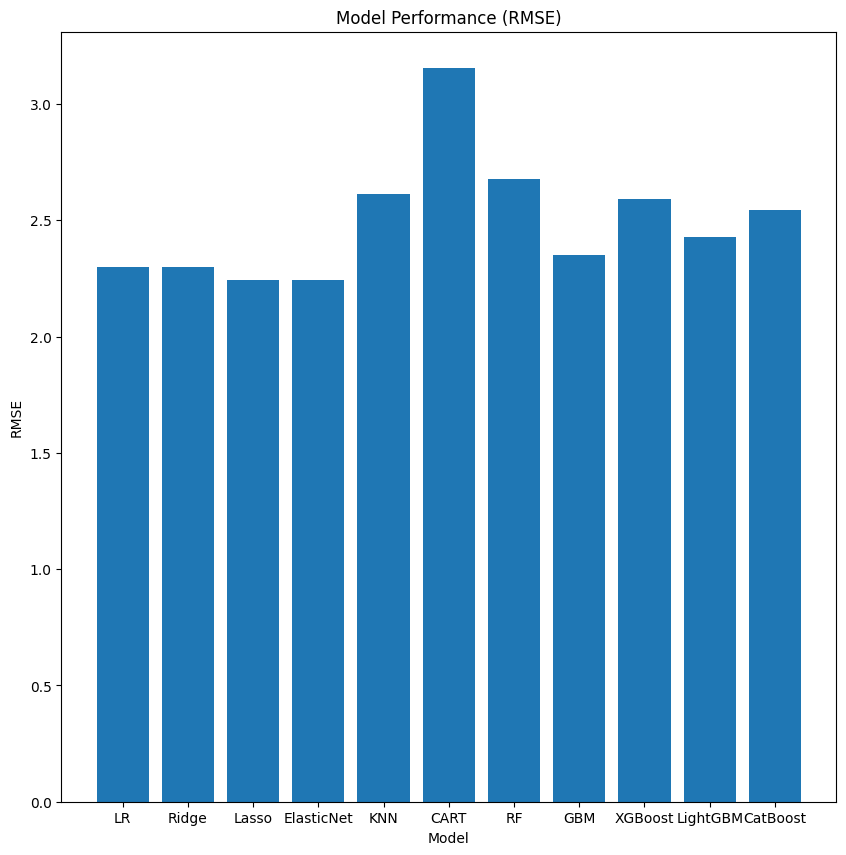

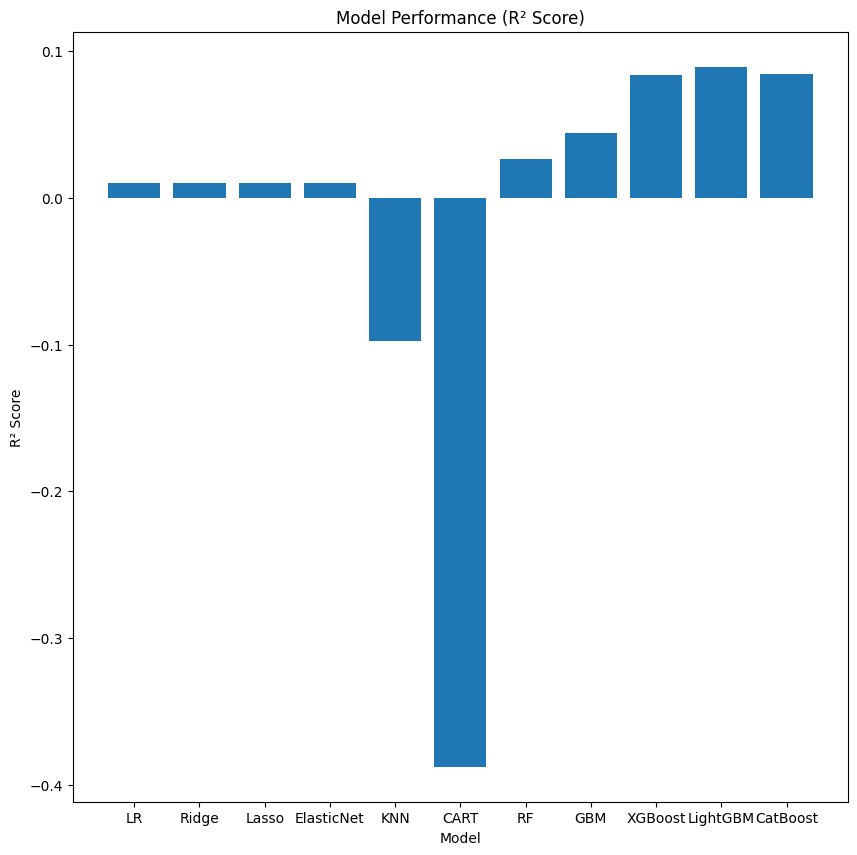

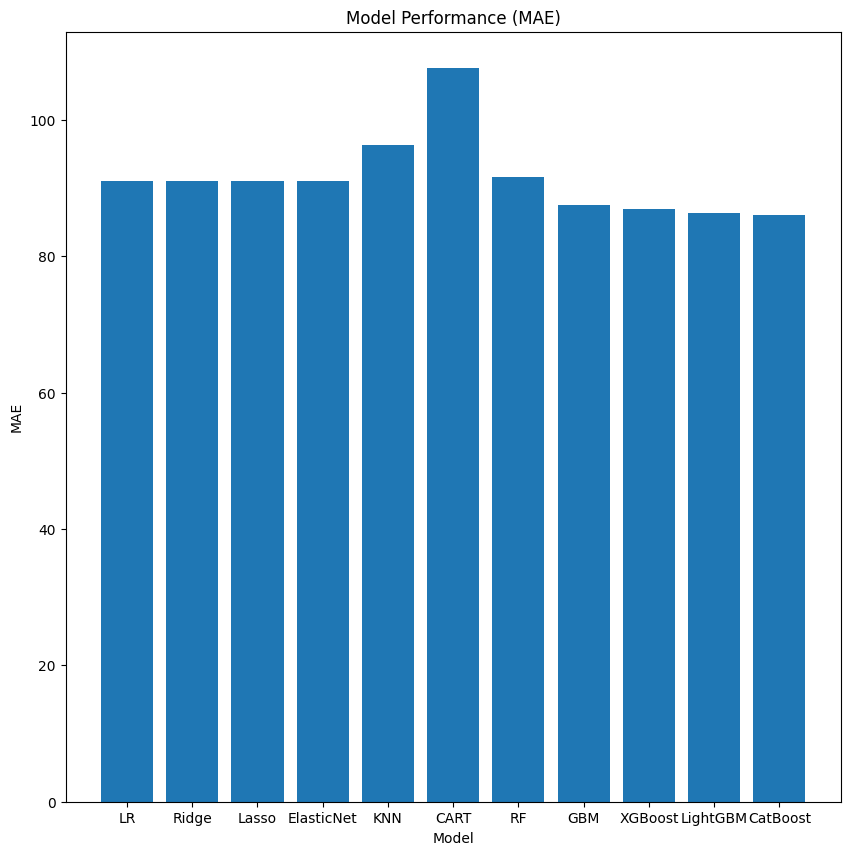

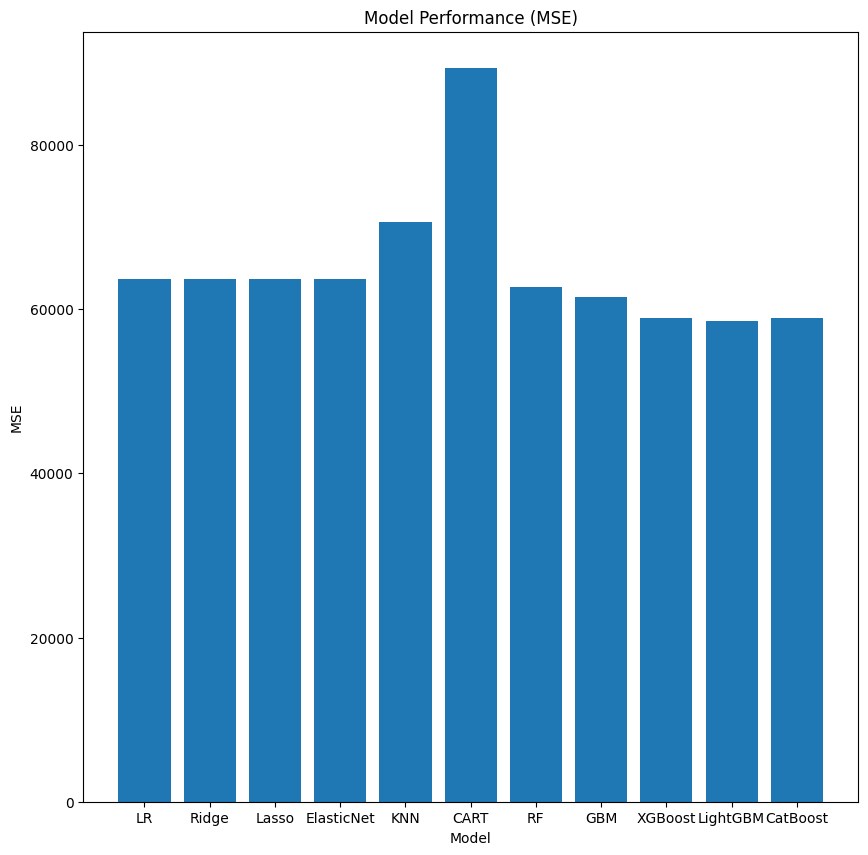

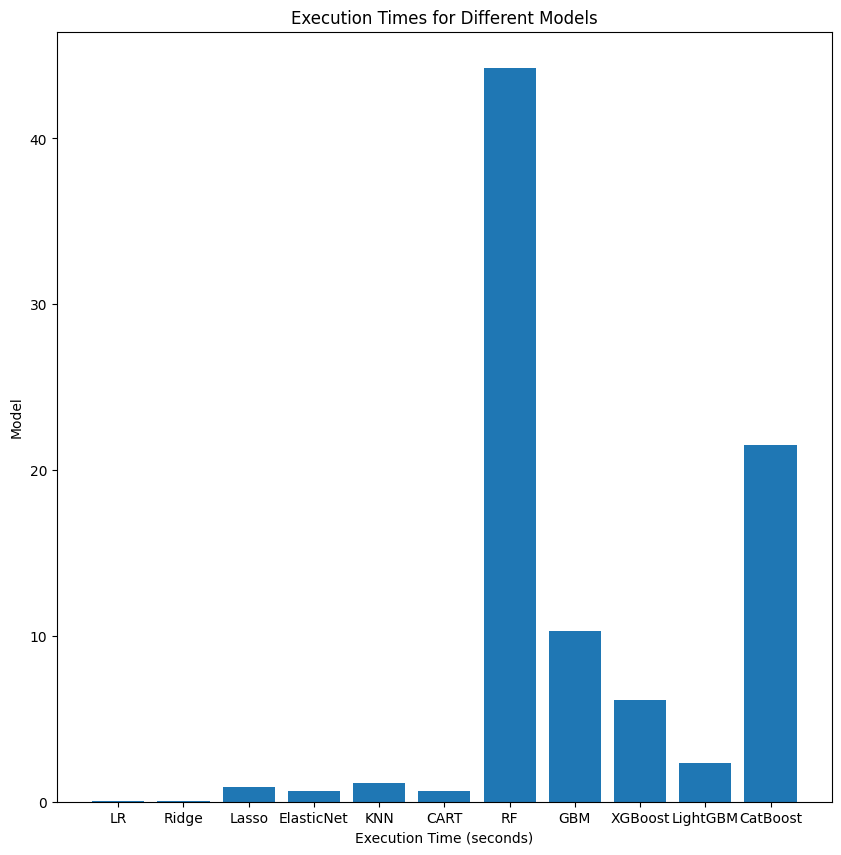

In [34]:
# Bagian ilustrasi (Nilai RMSE)
plt.figure(figsize=(10, 10))
plt.bar([name for name, _ in models[:len(rmse_scores)]], rmse_scores)
plt.xlabel("Model")
plt.ylabel("RMSE")
plt.title("Model Performance (RMSE)")
plt.show()

# Grafik R²
plt.figure(figsize=(10, 10))
plt.bar([name for name, _ in models[:len(r2_scores)]], r2_scores)
plt.xlabel("Model")
plt.ylabel("R² Score")
plt.title("Model Performance (R² Score)")
plt.show()

# Grafik nilai MAE
plt.figure(figsize=(10, 10))
plt.bar([name for name, _ in models[:len(mae_scores)]], mae_scores)
plt.xlabel("Model")
plt.ylabel("MAE")
plt.title("Model Performance (MAE)")
plt.show()

# Grafik nilai MSE
plt.figure(figsize=(10, 10))
plt.bar([name for name, _ in models[:len(mse_scores)]], mse_scores)
plt.xlabel("Model")
plt.ylabel("MSE")
plt.title("Model Performance (MSE)")
plt.show()

# Grafik waktu eksekusi
plt.figure(figsize=(10, 10))
plt.bar([name for name, _ in models[:len(execution_times)]], execution_times)
plt.xlabel("Execution Time (seconds)")
plt.ylabel("Model")
plt.title("Execution Times for Different Models")
plt.show()

## **c. Tuning Model Klasifikasi (Optional)**

Gunakan GridSearchCV, RandomizedSearchCV, atau metode lainnya untuk mencari kombinasi hyperparameter terbaik

In [ ]:
#Type your code here

## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

Berikut adalah rekomendasi tahapannya.
1. Gunakan model dengan hyperparameter terbaik.
2. Hitung ulang metrik evaluasi untuk melihat apakah ada peningkatan performa.

In [ ]:
#Type your code here

## **e. Analisis Hasil Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Bandingkan hasil evaluasi sebelum dan setelah tuning (jika dilakukan).
2. Identifikasi kelemahan model, seperti:
  - Precision atau Recall rendah untuk kelas tertentu.
  - Apakah model mengalami overfitting atau underfitting?
3. Berikan rekomendasi tindakan lanjutan, seperti mengumpulkan data tambahan atau mencoba algoritma lain jika hasil belum memuaskan.